## Physics 152L Radioactivity Lab ##

### 1. Read in the data

Import the usual libraries, and then read in the data from the saved CSV file into a Pandas dataframe.

We can use df.info() to get a basic summary of the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./RadioactivityLab.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Time (s) Background                         75 non-null     float64
 1   Geiger Counts (counts/sample) Background    75 non-null     float64
 2   RootN (cts/5s) Background                   75 non-null     float64
 3   Background Subtracted (cts/5s) Background   75 non-null     float64
 4   Time (s) Background2                        686 non-null    float64
 5   Geiger Counts (counts/sample) Background2   686 non-null    int64  
 6   RootN (cts/5s) Background2                  686 non-null    float64
 7   Background Subtracted (cts/5s) Background2  686 non-null    float64
 8   Time (s) Barium                             144 non-null    float64
 9   Geiger Counts (counts/sample) Barium        144 non-null    float64
 10  RootN (cts/5s)

### 2. Splitting Up The Data ###

Inspection of the dataframe shows us that there are five data sets from the different
parts of the experiment that are combined into our single CSV file, and hence into our
initial dataframe.

We can use df.filter() to parse this main dataframe and create separate dataframes for
each part of the experiment.

In [2]:
background = df.filter(['Time (s) Background',
                        'Geiger Counts (counts/sample) Background',
                        'RootN (cts/5s) Background',
                        'Background Subtracted (cts/5s) Background'], axis=1).dropna()
background2 = df.filter(['Time (s) Background2',
                        'Geiger Counts (counts/sample) Background2',
                        'RootN (cts/5s) Background2',
                        'Background Subtracted (cts/5s) Background2'], axis=1).dropna()
barium = df.filter(['Time (s) Barium',
                        'Geiger Counts (counts/sample) Barium',
                        'RootN (cts/5s) Barium',
                        'Background Subtracted (cts/5s) Barium'], axis=1).dropna()
radium = df.filter(['Time (s) Radium',
                        'Geiger Counts (counts/sample) Radium',
                        'RootN (cts/5s) Radium',
                        'Background Subtracted (cts/5s) Radium'], axis=1).dropna()
radsamples = df.filter(['Time (s) RadSamples',
                        'Geiger Counts (counts/sample) RadSamples',
                        'RootN (cts/5s) RadSamples',
                        'Background Subtracted (cts/5s) RadSamples'], axis=1).dropna()

### 3.  Part I:  Background Measurments ###

We begin by plotting the data from part I.  

In order to calculate the average background rate, with uncertainty, we do the following:
* Get the total integrated counts
* Get the total time
* Calculate the average rate
* Calculate the uncertainty, using the fact that $\Delta N = \sqrt{N}$.

There are two background measurements in the CSV file, and so we will do the same thing
for each of these two data sets.

Counts =  114.0  Time =  375.0  Rate =  18.24  +/-  1.7083325203250097


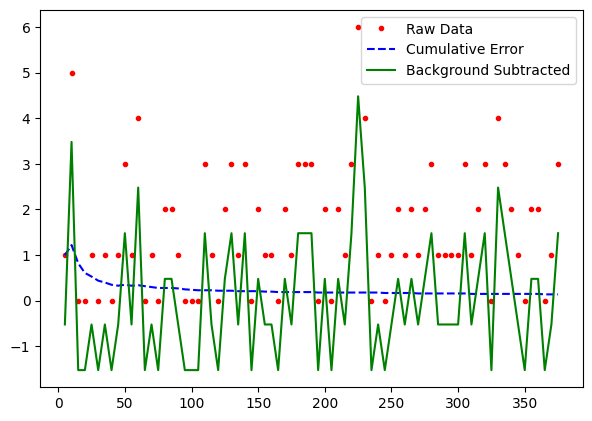

In [3]:
fig=plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(background['Time (s) Background'],
         background['Geiger Counts (counts/sample) Background'],'r.', label = 'Raw Data')
plt.plot(background['Time (s) Background'],
         background['RootN (cts/5s) Background'],'b--', label = 'Cumulative Error')
plt.plot(background['Time (s) Background'],
         background['Background Subtracted (cts/5s) Background'],'g-', 
         label = 'Background Subtracted')
plt.legend()

entries = len(background)
count_sum = background['Geiger Counts (counts/sample) Background'].sum()
end_time = background['Time (s) Background'][entries-1]
rate = count_sum/end_time*60 
erate = np.sqrt(count_sum)/end_time*60.0
        
print ('Counts = ',count_sum,' Time = ',end_time,' Rate = ',rate,' +/- ',erate)

Counts =  1231  Time =  3430.0  Rate =  21.533527696793  +/-  0.6137424417323207


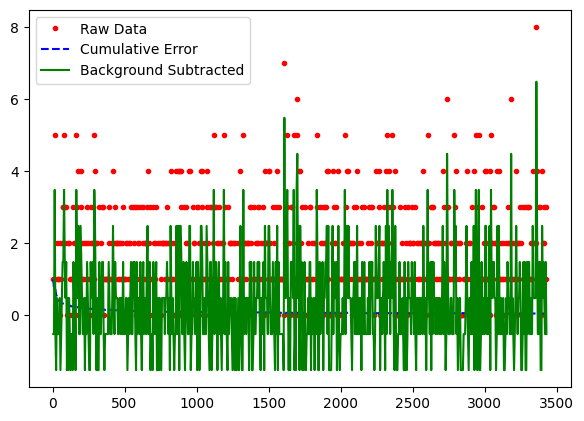

In [4]:
fig=plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(background2['Time (s) Background2'],
         background2['Geiger Counts (counts/sample) Background2'],'r.',label = 'Raw Data' )
plt.plot(background2['Time (s) Background2'],
         background2['RootN (cts/5s) Background2'],'b--', label = 'Cumulative Error' )
plt.plot(background2['Time (s) Background2'],
         background2['Background Subtracted (cts/5s) Background2'],
         'g-', label = 'Background Subtracted')
plt.legend()

entries = len(background2)
count_sum = background2['Geiger Counts (counts/sample) Background2'].sum()
end_time = background2['Time (s) Background2'][entries-1]
rate = count_sum/end_time*60 
erate = np.sqrt(count_sum)/end_time*60.0
        
print ('Counts = ',count_sum,' Time = ',end_time,' Rate = ',rate,' +/- ',erate)

### 3.  Barium Measurements

Plot the barium data.  The expected distribution is:

\begin{equation}
R(t) = R_0 e^{-Bt} \nonumber
\end{equation}

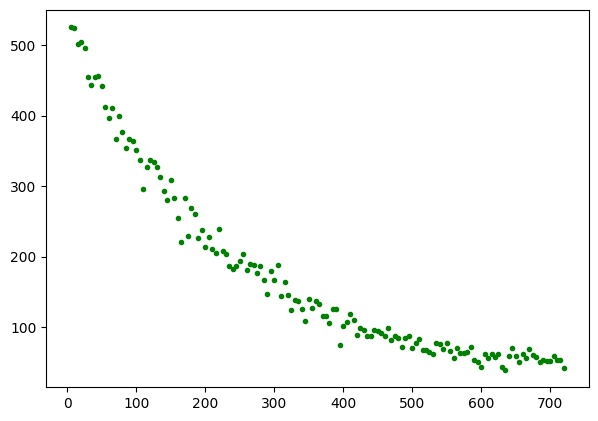

In [5]:
fig=plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(barium['Time (s) Barium'],
         barium['Background Subtracted (cts/5s) Barium'],'g.',
         label='Background Subtracted')

So, the distribution looks roughly exponential, which is good.  But, in order to extract the parameters of this distribution, i.e. $R_0$ and $B$, we take a slightly different approach.

Taking the natural logarithm of both sides, we have that:

\begin{equation}
ln(R) = ln(R_0 e^{-Bt}) = ln(R_0) - Bt \nonumber
\end{equation}

Thus, if we plot $ln(R)$ vs. $t$, then we expect a $linear$ graph, with a positive y-intercept (=$ln(R_0)$) and negative slope (=$-B$).

We can use the linear regression fitting model from sklearn to fit this data, and extract
the numerical values of the slope and intercept.

Fit: y_intercept =  [6.13624237]
Fit: slope =  [[-0.00339809]]


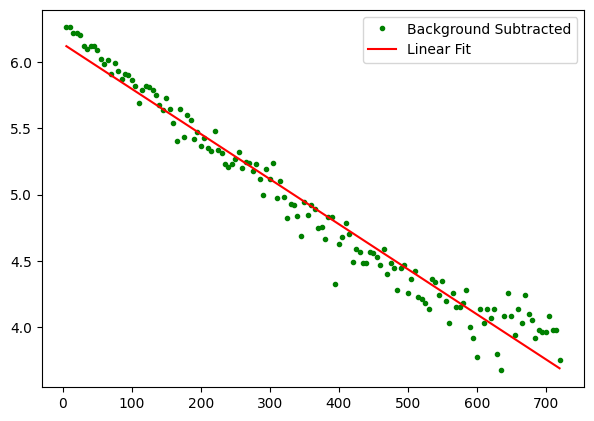

In [6]:
fig=plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(barium['Time (s) Barium'],
         np.log(barium['Background Subtracted (cts/5s) Barium']),'g.',
         label='Background Subtracted')

from sklearn import linear_model

reg = linear_model.LinearRegression()

x_data = barium['Time (s) Barium'].values.reshape(-1, 1)
y_data = np.log(barium['Background Subtracted (cts/5s) Barium'].values.reshape(-1, 1))

reg.fit(x_data,y_data)

print ('Fit: y_intercept = ',reg.intercept_)
print ('Fit: slope = ',reg.coef_)

y_fit = x_data*reg.coef_ + reg.intercept_
plt.plot(x_data,y_fit,'r-',label='Linear Fit')
plt.legend()

Note that the linear fit is NOT a particularly good one, because by the end of the data set, it
appears that the radioactive material has mostly decayed away, and we are not seeing the
same exponential fall-off.

So, what to do?  Well, we can limit the region of the fit to just the first 450 second or so, where the decay does appear to follow the expected log-linear dependence.

Fit: y_intercept =  [6.25239814]
Fit: slope =  [[-0.00396822]]
Half-Life =  174.67446822260646  seconds.


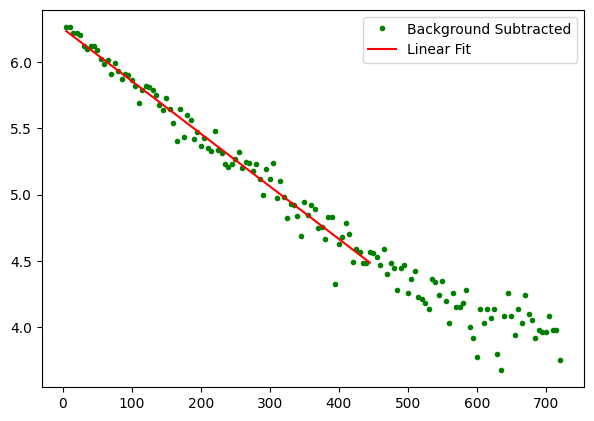

In [7]:
barium2 = barium[barium['Time (s) Barium'] < 450]

fig=plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(barium['Time (s) Barium'],
         np.log(barium['Background Subtracted (cts/5s) Barium']),'g.',
         label='Background Subtracted')

from sklearn import linear_model

reg = linear_model.LinearRegression()

x_data = barium2['Time (s) Barium'].values.reshape(-1, 1)
y_data = np.log(barium2['Background Subtracted (cts/5s) Barium'].values.reshape(-1, 1))

reg.fit(x_data,y_data)

print ('Fit: y_intercept = ',reg.intercept_)
print ('Fit: slope = ',reg.coef_)

print ('Half-Life = ',float(-np.log(2)/reg.coef_),' seconds.')

y_fit = x_data*reg.coef_ + reg.intercept_
plt.plot(x_data,y_fit,'r-',label='Linear Fit')
plt.legend()

###  4. Measurements with Different Absorbers ###

Let's begin by looking at the raw data.

We that there are five distinct "sections" in the data set that correspond to five
different experimental conditions:

* Gamma + Beta Source with no absorber
* Gamma + Beta Source with absorber to block beta particles
* Gamma + Beta Source with Cardboard absorber
* Gamma + Beta Source with Aluminum absorber
* Gamma + Beta Source with Lead absorber

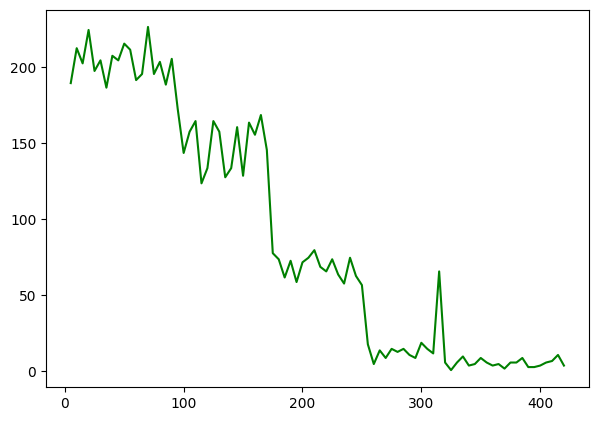

In [8]:
fig=plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(radium['Time (s) Radium'],radium['Background Subtracted (cts/5s) Radium'],'g-')

For each of the five measurements, we will set a time range (t1min and t1max).  Then, we filter the data set to include only measurements during these time windows.  Once we have the filtered data set, we can calculate an average rate over that time window.  In each case, we plot a horizontal line at the appropriate rate for that time window on top of the raw data.

Gamma+Beta Rate =  203.36235294117645  cts/5 sec
Gamma Rate =  149.0953846153846  cts/5 sec
Beta Rate =  54.26696832579185  cts/5 sec

Cardboard Rate =  67.84363636363638  cts/5 sec
Aluminum Rate =  12.605  cts/5 sec
Lead Rate =  4.71076923076923  cts/5 sec


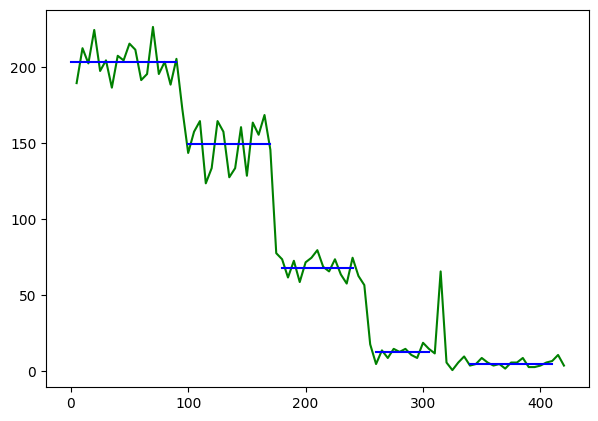

In [9]:
fig=plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(radium['Time (s) Radium'],radium['Background Subtracted (cts/5s) Radium'],'g-')

t1min = 0.0
t1max = 90.0
gammabeta = radium[radium['Time (s) Radium']>t1min]
gammabeta = gammabeta[gammabeta['Time (s) Radium']<t1max]

gammabeta_rate = gammabeta['Background Subtracted (cts/5s) Radium'].mean()*1.0
print ('Gamma+Beta Rate = ',gammabeta_rate,' cts/5 sec')

x = np.array([t1min,t1max])
y = np.array([gammabeta_rate,gammabeta_rate])
plt.plot(x,y,'b-')

t1min = 100.0
t1max = 170.0
gamma = radium[radium['Time (s) Radium']>t1min]
gamma = gamma[gamma['Time (s) Radium']<t1max]

gamma_rate = gamma['Background Subtracted (cts/5s) Radium'].mean()*1.0
print ('Gamma Rate = ',gamma_rate,' cts/5 sec')
print ('Beta Rate = ',gammabeta_rate-gamma_rate,' cts/5 sec')

x = np.array([t1min,t1max])
y = np.array([gamma_rate,gamma_rate])
plt.plot(x,y,'b-')

print ("")

t1min = 180.0
t1max = 240.0
cardboard = radium[radium['Time (s) Radium']>t1min]
cardboard = cardboard[cardboard['Time (s) Radium']<t1max]

cardboard_rate = cardboard['Background Subtracted (cts/5s) Radium'].mean()*1.0
print ('Cardboard Rate = ',cardboard_rate,' cts/5 sec')

x = np.array([t1min,t1max])
y = np.array([cardboard_rate,cardboard_rate])
plt.plot(x,y,'b-')

t1min = 260.0
t1max = 305.0
aluminum = radium[radium['Time (s) Radium']>t1min]
aluminum = aluminum[aluminum['Time (s) Radium']<t1max]

aluminum_rate = aluminum['Background Subtracted (cts/5s) Radium'].mean()*1.0
print ('Aluminum Rate = ',aluminum_rate,' cts/5 sec')

x = np.array([t1min,t1max])
y = np.array([aluminum_rate,aluminum_rate])
plt.plot(x,y,'b-')

t1min = 340.0
t1max = 410.0
lead = radium[radium['Time (s) Radium']>t1min]
lead = lead[lead['Time (s) Radium']<t1max]

lead_rate = lead['Background Subtracted (cts/5s) Radium'].mean()*1.0
print ('Lead Rate = ',lead_rate,' cts/5 sec')

x = np.array([t1min,t1max])
y = np.array([lead_rate,lead_rate])
plt.plot(x,y,'b-')

###  4. Measurements with Different Sources (With and Without Lead Absorber)

In this part of the experiment, there are ten separate measurements, corresponding to five different sources, with data taken both with and without a lead absorber.  

We begin by plotting the raw data, and we can clearly see the ten different situations.

As in the last section, we will calculate the average rate for each of these ten time windows, and plot this average rate on top of the data.  Of course, we need to define the ten time windows (as four arrays - two for no absorber and two for absorber).


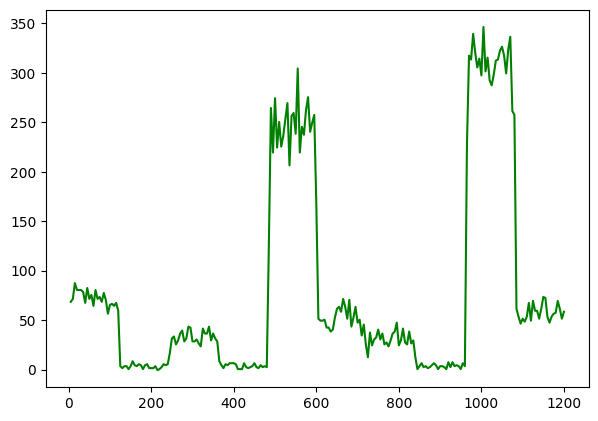

In [10]:
fig=plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(radsamples['Time (s) RadSamples'],
         radsamples['Background Subtracted (cts/5s) RadSamples'],'g-')

NoLeadRate[ 1 ] =  73.63000000000001  cts/5 sec
LeadRate[ 1 ] =  3.1642105263157894  cts/5 sec

NoLeadRate[ 2 ] =  33.06823529411764  cts/5 sec
LeadRate[ 2 ] =  3.8550000000000004  cts/5 sec

NoLeadRate[ 3 ] =  246.01333333333335  cts/5 sec
LeadRate[ 3 ] =  55.095384615384624  cts/5 sec

NoLeadRate[ 4 ] =  31.432380952380953  cts/5 sec
LeadRate[ 4 ] =  3.7431578947368425  cts/5 sec

NoLeadRate[ 5 ] =  311.28000000000003  cts/5 sec
LeadRate[ 5 ] =  59.06823529411765  cts/5 sec



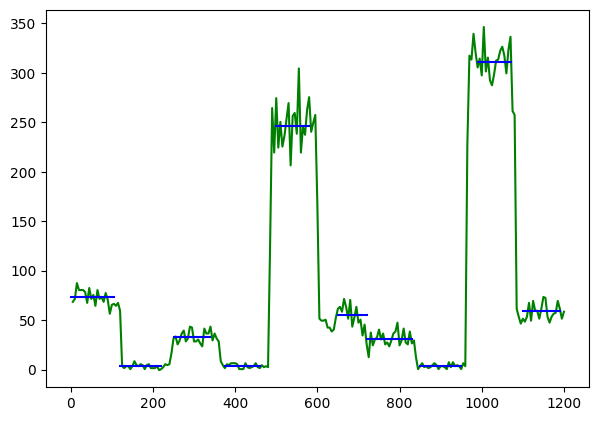

In [11]:
fig=plt.figure(figsize=(7,5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(radsamples['Time (s) RadSamples'],
         radsamples['Background Subtracted (cts/5s) RadSamples'],'g-')

tsmin = np.array([0.0,250.0,500.0,720.0,990.0])
tsmax = np.array([105.0,340.0,580.0,830.0,1070.0])
tlmin = np.array([120.0,375.0,650.0,850.0,1100.0])
tlmax = np.array([220.0,460.0,720.0,950.0,1190.0])

for i in range(5):
    t1min = tsmin[i]
    t1max = tsmax[i]
    rate = radsamples[radsamples['Time (s) RadSamples']>t1min]
    rate = rate[rate['Time (s) RadSamples']<t1max]

    no_lead_rate = rate['Background Subtracted (cts/5s) RadSamples'].mean()*1.0
    print ('NoLeadRate[',i+1,'] = ',no_lead_rate,' cts/5 sec')

    x = np.array([t1min,t1max])
    y = np.array([no_lead_rate,no_lead_rate])
    plt.plot(x,y,'b-')
    
    t1min = tlmin[i]
    t1max = tlmax[i]
    rate = radsamples[radsamples['Time (s) RadSamples']>t1min]
    rate = rate[rate['Time (s) RadSamples']<t1max]

    lead_rate = rate['Background Subtracted (cts/5s) RadSamples'].mean()*1.0
    print ('LeadRate[',i+1,'] = ',lead_rate,' cts/5 sec')

    x = np.array([t1min,t1max])
    y = np.array([lead_rate,lead_rate])
    plt.plot(x,y,'b-')
    print()